### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/1_Environment_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
%%capture
!apt-get install xvfb
!pip install swig==4.2.1
!pip install box2d-py==2.3.8
!pip install gymnasium[box2d,atari,accept-rom-license]==0.29.1
!pip install pyvirtualdisplay==3.0
!pip install opencv-python-headless
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import gymnasium
from time import time,sleep
sns.set_style("darkgrid")

# 1_Environment_and_Agent

### Introduction to Reinforcement Learning (RL)

In RL, we study the interaction between an **agent** and an **environment**. The agent takes actions to achieve a goal, guided by rewards from the environment. Our aim is to develop agents that can learn optimal behaviors through these interactions.



### Creating an Environment

An environment in RL defines the space in which the agent operates. It returns a new state and a reward for each action taken by the agent.

In [ ]:
class Env:
    def __init__(self):
        self.state = np.random.randint(2)
        self.done = False

    def step(self, action):
        if (action % 2 == self.state):
            reward = 1
        else:
            reward = -1
        self.state = np.random.randint(2)
        return self.state, reward, self.done, {}, {}

    def reset(self):
        self.state = np.random.randint(2)
        self.done = False
        return self.state

### Building an Agent
Agents in RL decide which actions to take in an environment. A simple agent might act randomly or follow a predetermined policy.



In [ ]:
class Agent:
    def __init__(self, env):
        pass

    def act(self, state):
        return np.random.randint(2)

### Running an Experiment

To evaluate our agent's performance, we generate trajectories of state-action-reward sequences and compute the total reward.


In [ ]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [state]
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, done, info, _ = env.step(action)
        res += [action, reward, state]

    return res

## Understanding the Environment and Agent

**Question 1:** What is the **state space** in the provided `Env` class?


**Question 2:** What is the **action space** in the provided `Env`/`Agent` class?


**Question 3:** What is the **Transition model** in the provided `Env` class?


**Question 4:** What is the **Policy** in the provided `Agent` class?


**Question 5:** What is the **Reward Function** in the provided `Env` class?


**Question 6:** What object **run_experiment** is returning?


**Exercise 1:** Instantiating the class `Agent` and `Env` to `run_experiment` on **100 steps**.



**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward**, also known as the return value. You can return more information from `run_experiment` to help.


**Question 7:** In this `MDP`, what is the **Expected Return** when following the random policy of the `Agent`?


**Question 8:** what would be the **best policy** function for the `Env` environment?


**Exercise 3:** Implement the best policy function and use it to run the best agent. Compare its performance to the random agent.



### Corrections

**Question 1:** What is the **state space** in the provided `Env` class?

**States:** $S = \{0,1\}$

**Question 2:** What is the **action space** in the provided `Env`/`Agent` class?

**Actions:** $A = \{0,1\}$ or $\mathbb{N^+}$

**Question 3:** What is the **Transition model** in the provided `Env` class?

**Transition model:** $P_{ss'}^a = \mathbb{P} [S_{t+1} = s' \vert S_t = s, A_t = a]$

For all $a \in A$, and for all $s, s' \in S : P_{ss'}^a = 0.5$

**Question 4:** What is the **Policy** in the provided `Agent` class?

Policy $\pi$ is defined as follows:
$\pi(0) = 0$ with probability $0.5$, $\pi(0) = 1$ with probability $0.5$
$\pi(1) = 0$ with probability $0.5$, $\pi(1) = 1$ with probability $0.5$

**Question 5:** What is the **Reward Function** in the provided `Env` class?

Reward Function $R(s, a)$ is deterministic in this case:

$R(0, a) = 1$ for all $a \in 2\mathbb{N}$
$R(0, a) = -1$ for all $a \in 2\mathbb{N} + 1$
$R(1, a) = 1$ for all $a \in 2\mathbb{N} + 1$
$R(1, a) = -1$ for all $a \in 2\mathbb{N}$

**Question 6:** What object does **run_experiment** return?

It returns a trajectory $(s0, a0, r0, s1, a1, r1, ...)$.

**Exercise 1:** Instantiate the class `Agent` and `Env` to `run_experiment` on **100 steps**.




In [ ]:
# Instantiation
env = Env()
agent = Agent(env)
run_experiment(env, agent, nb_steps=100)


**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward** also known as the return value for each step of the trajectory. Provide the **cumulative reward** and **discouted (0.8) cumultative reward** at step 42.  You can return more information from `run_experiment` to help.

In [ ]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [state]
    rewards = []
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, done, info, _ = env.step(action)
        res += [action, reward, state]
        rewards.append(reward)

    return res, rewards

In [82]:
def compute_cumulative_reward(rewards, discout_factor=1):
    trajectory_steps_length = len(rewards)
    cumulative_rewards = []
    for step in range(trajectory_steps_length):
        rewards_from_step = rewards[step:]
        cumulative_reward = 0
        step = 0
        for reward in rewards_from_step:
            cumulative_reward += reward * discout_factor ** step
            step += 1
        cumulative_rewards.append(cumulative_reward)
    return cumulative_rewards

In [88]:
import scipy.signal
def discount_cumsum(x, discount):
    return scipy.signal.lfilter([1], [1, float(-discount)], x[::-1], axis=0)[::-1]

from rl_introduction.rl_introduction.tools import discount_cumsum

In [ ]:
_, rewards = run_experiment(env, agent, nb_steps=100)
print(compute_cumulative_reward(rewards)[42], compute_cumulative_reward(rewards, 0.8)[42])




**Question 7:** In this `MDP`, what is the **Expected Return** when following the random policy of the `Agent`?


The expected return is 0.


**Question 8:** what would be the **best policy** function for the `Env` environment?

$\pi(0) = 0$ with probablitly 1, 1 with probability 0
$\pi(1) = 0$ with probablitly 0, 1 with probability 1

**Exercise 3:** Implement the best policy function and use it to run the best agent. Compare its performance to the random agent.


In [ ]:

def best_policy(state):
    if state == 0:
        return 0
    else:
        return 1
class Best_Agent:
    def __init__(self, env):
        pass

    def act(self, state):
        return best_policy(state)
# Instantiation
env = Env()
my_random_agent = Agent(env)
my_best_agent = Best_Agent(env)

nb_experiment = 100
sum_random_agent_rewards = []
sum_best_agent_rewards = []
for exp in range(nb_experiment):
    _, random_agent_rewards = run_experiment(env, my_random_agent, nb_steps=100)
    _, best_agent_rewards = run_experiment(env, my_best_agent, nb_steps=100)
    sum_random_agent_rewards.append(sum(random_agent_rewards))
    sum_best_agent_rewards. append(sum(best_agent_rewards))

plt.plot(sum_random_agent_rewards, 'o')
plt.plot(sum_best_agent_rewards,'o')
plt.title('Best agent vs Random agent / sum reward')

## Start with Gymnasium's Environment


In this section, we delve into the diverse range of environments offered by Gymnasium, which is recognized as the gold standard for defining reinforcement learning environments. Our exploration will provide insights into the dynamics of different systems and how they can be modeled and understood within the framework of reinforcement learning.

Execute the code below to initiate and observe experiments across various environments: **'FrozenLake-v1'**, **'CartPole-v1'**, **'LunarLanderContinuous-v2'**, and **'PongNoFrameskip-v4'**. While these experiments run, visit the Gymnasium documentation to acquaint yourself with the detailed characteristics and nuances of each environment.

In [57]:
from rl_introduction.rl_introduction.render_colab import exp_render
# Environments to run experiments on
env_render_configs = [{"name":'FrozenLake-v1', "fps":2, "nb_step":30},
 {"name":'CartPole-v1', "fps":17, "nb_step":120},
  {"name":'LunarLanderContinuous-v2', "fps":30, "nb_step":300},
   {"name":'PongNoFrameskip-v4', "fps":40, "nb_step":800}]
for env_render_config in env_render_configs:
  exp_render(env_render_config)

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


###Questions on Environment Dynamics
**Question 1:** Actions and States
For each environment (FrozenLake-v1, CartPole-v1, LunarLanderContinuous-v2, PongNoFrameskip-v4), identify the action space and state space. Specify whether each is discrete or continuous, and provide their sizes.

FrozenLake-v1:

Action Space: Discrete (4 possible actions)
State Space: Discrete (16 possible states)
CartPole-v1:

Action Space: Discrete (2 possible actions)
State Space: Continuous (4-dimensional space)
LunarLanderContinuous-v2:

Action Space: Continuous (2-dimensional space)
State Space: Continuous (8-dimensional space)
PongNoFrameskip-v4:

Action Space: Discrete (6 possible actions)
State Space: Image space, typically considered continuous (210x160x3 pixels)

**Question 2:** Transition Models
For each environment, is the transition model deterministic or probabilistic?

FrozenLake-v1: Probabilistic

CartPole-v1: Deterministic with some stochasticity due to simulation

LunarLanderContinuous-v2: Deterministic with some stochasticity due to simulation

PongNoFrameskip-v4: Deterministic

**Question 3:** Reward Functions
Define the reward function for each environment.

FrozenLake-v1: Reward of 1 for reaching the goal, 0 otherwise.

CartPole-v1: Reward of 1 for every step taken, including the termination step.

LunarLanderContinuous-v2: Reward for landing on the pad between two flags, with penalties for fuel usage and crashing.

PongNoFrameskip-v4: Reward of +1 for scoring a point against the opponent, -1 when the opponent scores.

### Exercises on Agent Performance

**Exercise 1:** Running an Experiment

Instantiate a random agent along with the Gymnasium environment, and run the experiment until completion (is_done=True) for the following four environments: 'FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v2', and 'PongNoFrameskip-v4'. Compute cumulative reward and number of step for each experiment.



In [80]:
import gymnasium as gym

class RandomAgent():
    def __init__(self, env):
        self.env = env

    def act(self, state):
        return self.env.action_space.sample()

def run_experiment(env_name):
    rewards = []
    nb_step = 0
    env = gym.make(env_name)
    rand_agent = RandomAgent(env)
    observation = env.reset()
    done = False
    while not done:
        action = rand_agent.act(observation)
        observation, reward, done, info, _ = env.step(action)
        nb_step += 1
        rewards.append(reward)
    env.close()
    return rewards,nb_step

env_names = ['FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v2', 'PongNoFrameskip-v4']
for env_name in env_names:
    rewards, nb_step = run_experiment(env_name)
    print(f"{env_name} cumulative reward: {sum(rewards)}, number steps: {nb_step}")


FrozenLake-v1 cumulative reward: 0.0, number steps: 10
CartPole-v1 cumulative reward: 25.0, number steps: 25
LunarLanderContinuous-v2 cumulative reward: -98.01299225702672, number steps: 90
PongNoFrameskip-v4 cumulative reward: -20.0, number steps: 4033


**Exercise 2:** Running Experiments and compute cumulative reward
Conduct 20 experiments for each environment using a random agent. For each environement display the cumulative reward with a discount factor of 0.5 and without discount factor of (=1).

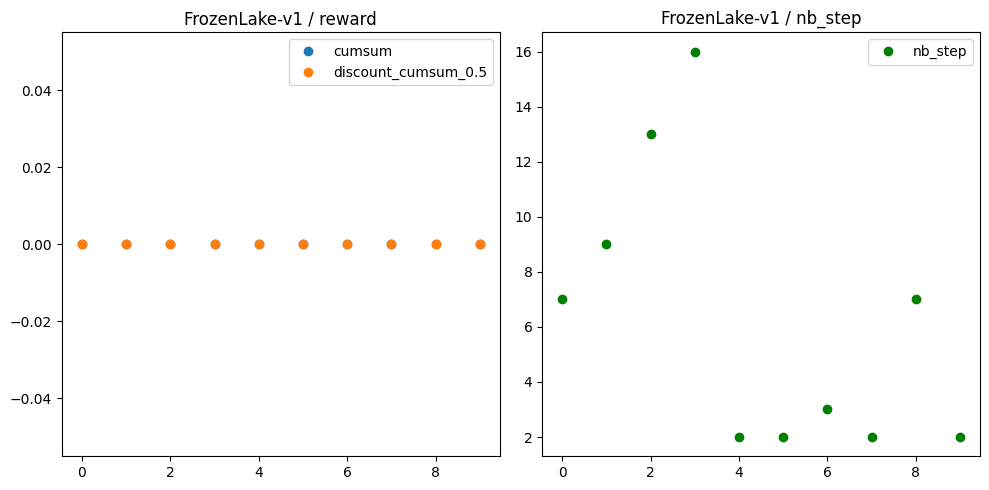

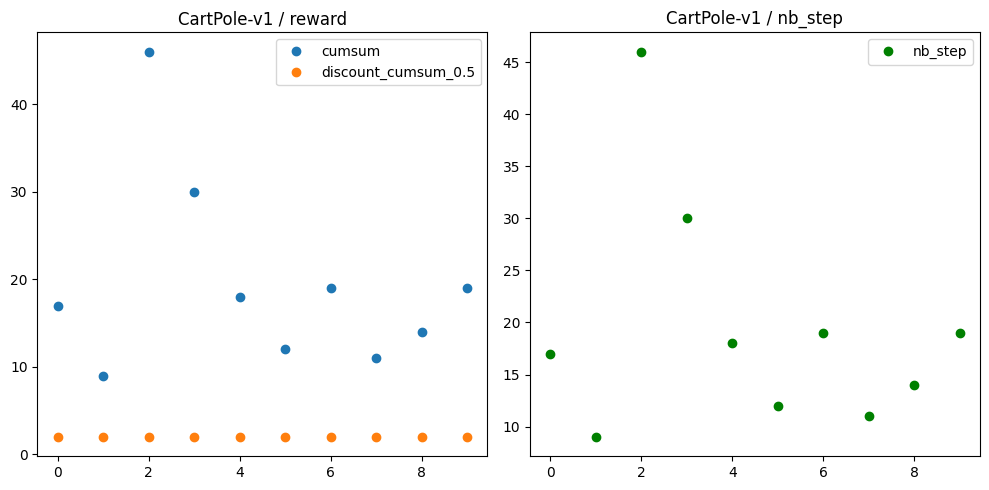

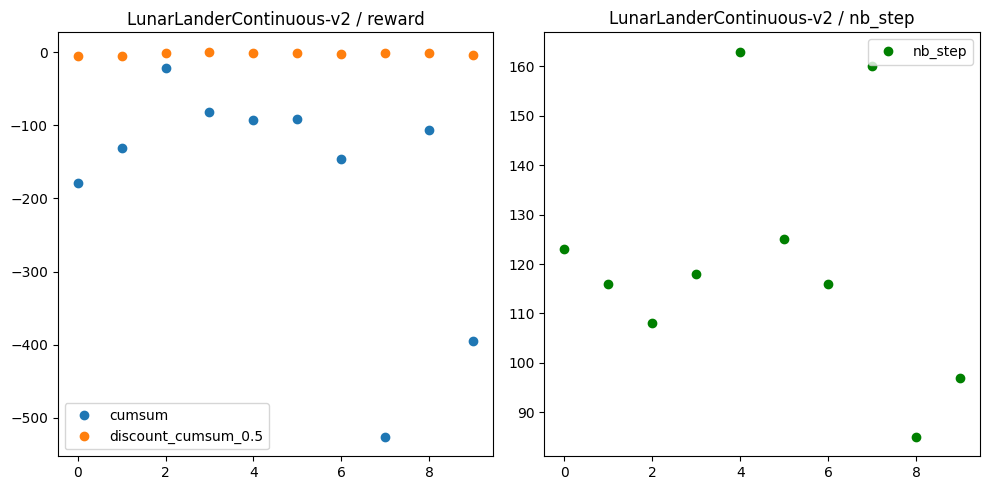

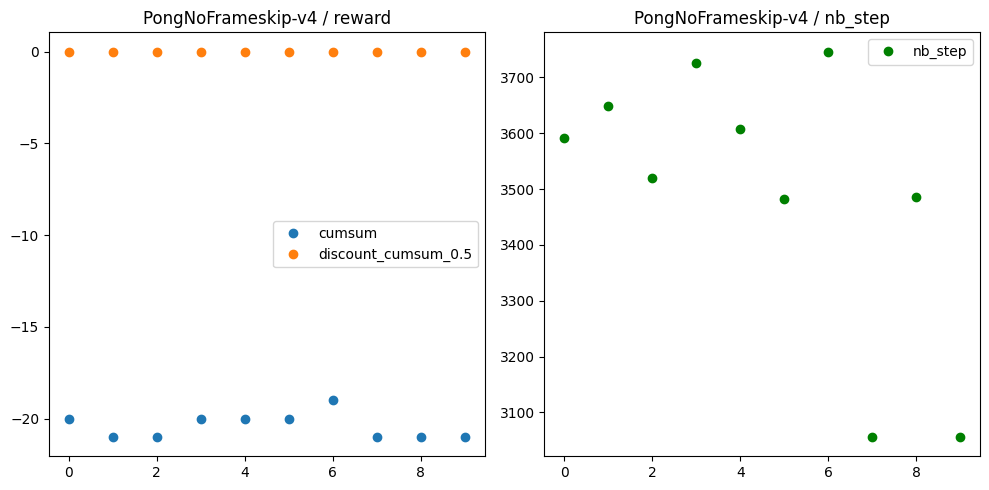

In [93]:
nb_experiment = 10
for env_name in env_names:
  random_agent_cum_rewards = []
  random_agent_cum_discout_rewards = []
  random_agent_nb_step = []
  for exp in range(nb_experiment):
      rewards, nb_step = run_experiment(env_name)
      random_agent_cum_rewards.append(discount_cumsum(rewards, 1)[0])
      random_agent_cum_discout_rewards.append(discount_cumsum(rewards, 0.5)[0])
      random_agent_nb_step.append(nb_step)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5)) # 1 row, 2 columns

  # Plot on the first subplot
  ax1.plot(random_agent_cum_rewards, 'o', label="cumsum")
  ax1.plot(random_agent_cum_discout_rewards, 'o', label="discount_cumsum_0.5")
  ax1.set_title(f'{env_name} / reward')
  ax1.legend()

  # Plot on the second subplot
  ax2.plot(random_agent_nb_step, 'o', label="nb_step", color='g')
  ax2.set_title(f'{env_name} / nb_step')
  ax2.legend()

  plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
  plt.show()